# Explore here

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score

In [49]:



diabetes = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
diabetes.shape

(768, 9)

In [51]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No hay valores nulos en el dataset

In [52]:
# Eliminamos duplicados
diabetes_final = diabetes.drop_duplicates().reset_index(drop = True)

diabetes_final.shape # En este caso al ejecutar la celda vemos que no había datos duplicados


(768, 9)

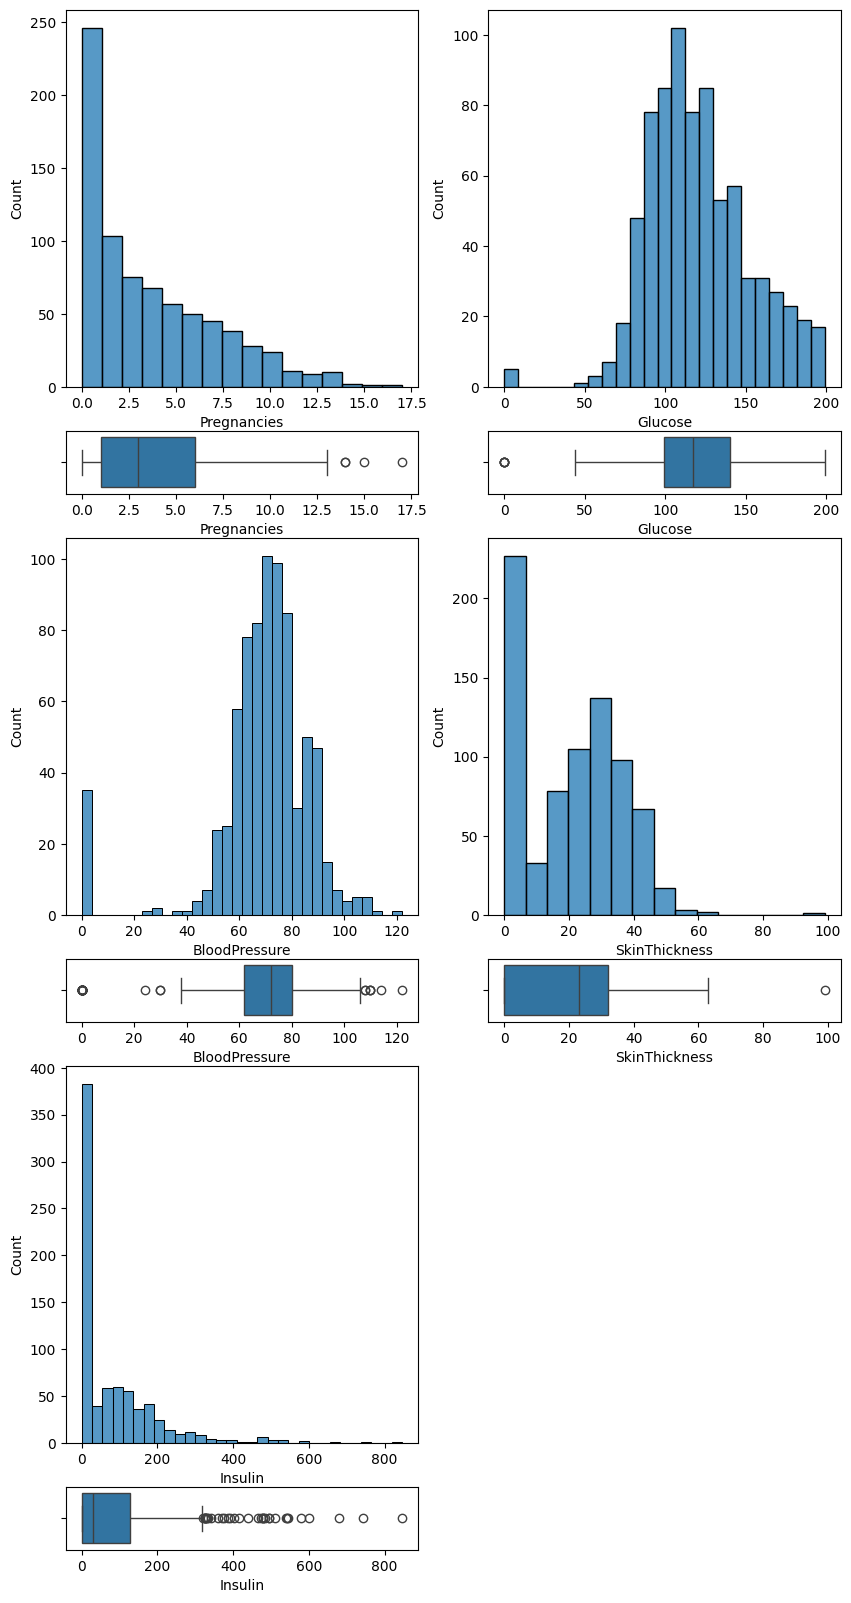

In [53]:
fig, axis = plt.subplots(6, 2, figsize = (10, 20), gridspec_kw = {"height_ratios": [6, 1, 6, 1, 6, 1]})

sns.histplot (ax = axis [0, 0], data = diabetes_final, x = 'Pregnancies')
sns.boxplot(ax = axis[1, 0], data = diabetes_final, x = 'Pregnancies')

sns.histplot (ax = axis [0, 1], data = diabetes_final, x = 'Glucose')
sns.boxplot(ax = axis[1, 1], data = diabetes_final, x = 'Glucose')

sns.histplot (ax = axis [2, 0], data = diabetes_final, x = 'BloodPressure')
sns.boxplot(ax = axis[3, 0], data = diabetes_final, x = 'BloodPressure')

sns.histplot (ax = axis [2, 1], data = diabetes_final, x = 'SkinThickness')
sns.boxplot(ax = axis[3, 1], data = diabetes_final, x = 'SkinThickness')

sns.histplot (ax = axis [4, 0], data = diabetes_final, x = 'Insulin')
sns.boxplot(ax = axis[5, 0], data = diabetes_final, x = 'Insulin')

fig.delaxes(axis[4, 1])
fig.delaxes(axis[5, 1])

Observamos que en varias gráficas hay datos con valor = 0, habrá que estudiar si esos valores pueden ser reales o simplemente, no disponían de ese dato. En tal caso, habría que sustituir esos valores por la mediana de la columna.

In [54]:
diabetes_final.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

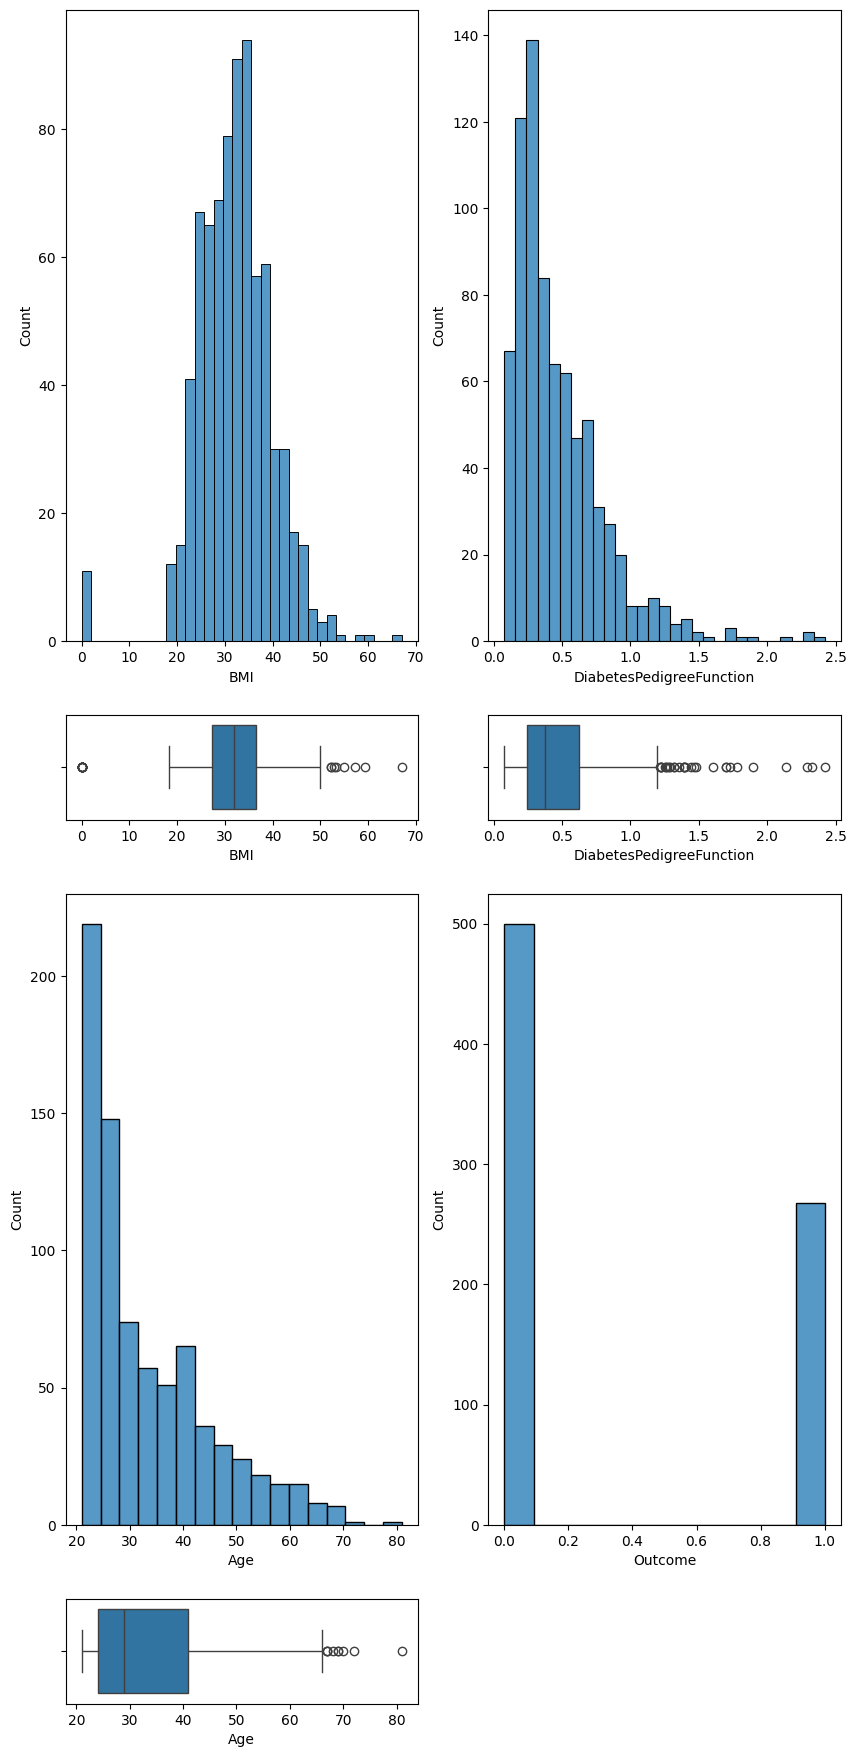

In [55]:
fig, axis = plt.subplots(4, 2, figsize = (10, 22), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot (ax = axis [0, 0], data = diabetes_final, x = 'BMI')
sns.boxplot(ax = axis[1, 0], data = diabetes_final, x = 'BMI')

sns.histplot (ax = axis [0, 1], data = diabetes_final, x = 'DiabetesPedigreeFunction')
sns.boxplot(ax = axis[1, 1], data = diabetes_final, x = 'DiabetesPedigreeFunction')

sns.histplot (ax = axis [2, 0], data = diabetes_final, x = 'Age')
sns.boxplot(ax = axis[3, 0], data = diabetes_final, x = 'Age')

sns.histplot (ax = axis [2, 1], data = diabetes_final, x = 'Outcome')

fig.delaxes(axis[3, 1])

Al igual que en las gráficas anteriores vemos datos con valores = 0, habrá que estudiar que hacemos con esos valores.

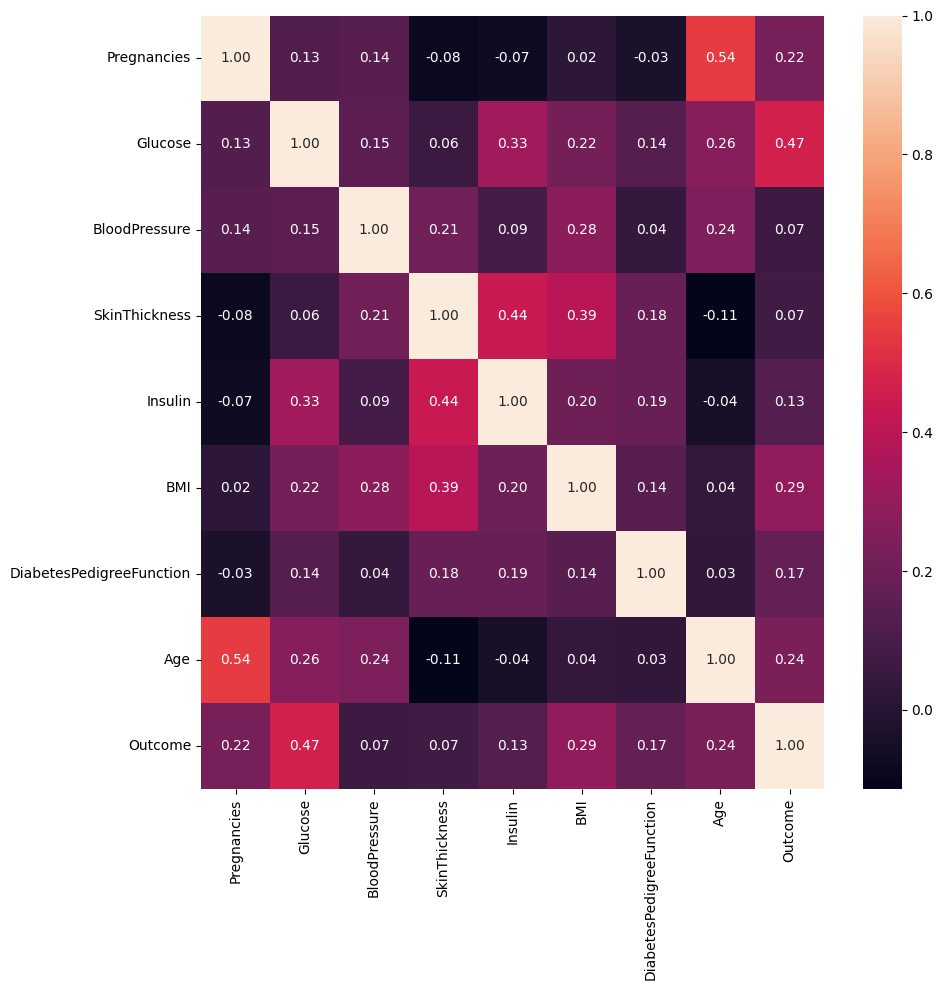

In [56]:
fig, axes = plt.subplots(figsize = (10,10))

sns.heatmap(diabetes_final[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = '.2f')

plt.tight_layout()

plt.show()

Al analizar el mapa de correlaciones vemos:

- La edad está relacionada con el número de embarazos del paciente, lo cual tiene sentido a mayor edad mayor número de embarazos.

- La variable de si el paciente presenta diabetes (Outcome) está relacionada con la variable glucosa, lo cual tiene muchisimo sentido ya que la enfermedad está relacionada con la cantidad de glucosa en sangre.

- Tambien vemos que la variable "Insulina" está relacionada con la variable "Grosor de la piel".

In [57]:
# Analicemos ahora los valores atípicos

diabetes_final.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
# Sustituimos los datos con valor 0 de algunas columnas por la mediana de dicha columna

columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

diabetes_copy = diabetes_final.copy()

for column in columnas:
    if diabetes_copy[column].dtype in ['int64', 'float64']: # Solo reemplazamos los 0 por la mediana si la columna es numérica
        median = diabetes_copy[column].median()
        diabetes_copy[column] = diabetes_copy[column].replace(0, median)


diabetes_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [60]:
X = diabetes_copy.drop("Outcome", axis = 1)
y = diabetes_copy["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

modelo_kbest = SelectKBest(k = 7)
modelo_kbest.fit(X_train, y_train)

selected_columns = X_train.columns[modelo_kbest.get_support()]
X_train_sel = pd.DataFrame(modelo_kbest.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(modelo_kbest.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,72.0,23.0,32.0,0.304,21.0
1,9.0,112.0,82.0,24.0,28.2,1.282,50.0
2,1.0,139.0,46.0,19.0,28.7,0.654,22.0
3,0.0,161.0,50.0,23.0,21.9,0.254,65.0
4,6.0,134.0,80.0,37.0,46.2,0.238,46.0


In [61]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [62]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,72.0,23.0,32.0,0.304,21.0,0
1,9.0,112.0,82.0,24.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,19.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,23.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,37.0,46.2,0.238,46.0,1


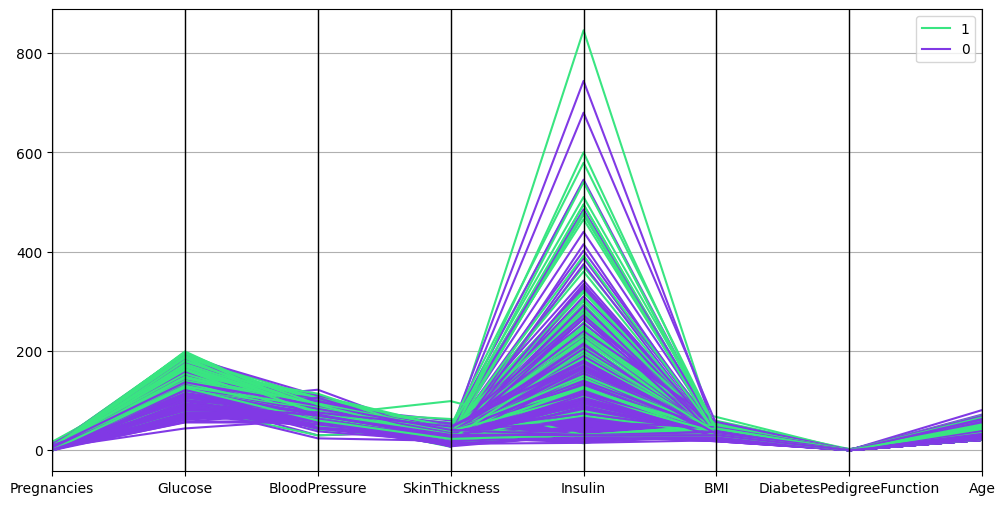

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(diabetes_copy, "Outcome", color = ("#39E581", "#8139E5"))

plt.show()

En la gráfica se puede ver la relación de las distintas variables con la variable objetivo (Outcome)

In [64]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [65]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

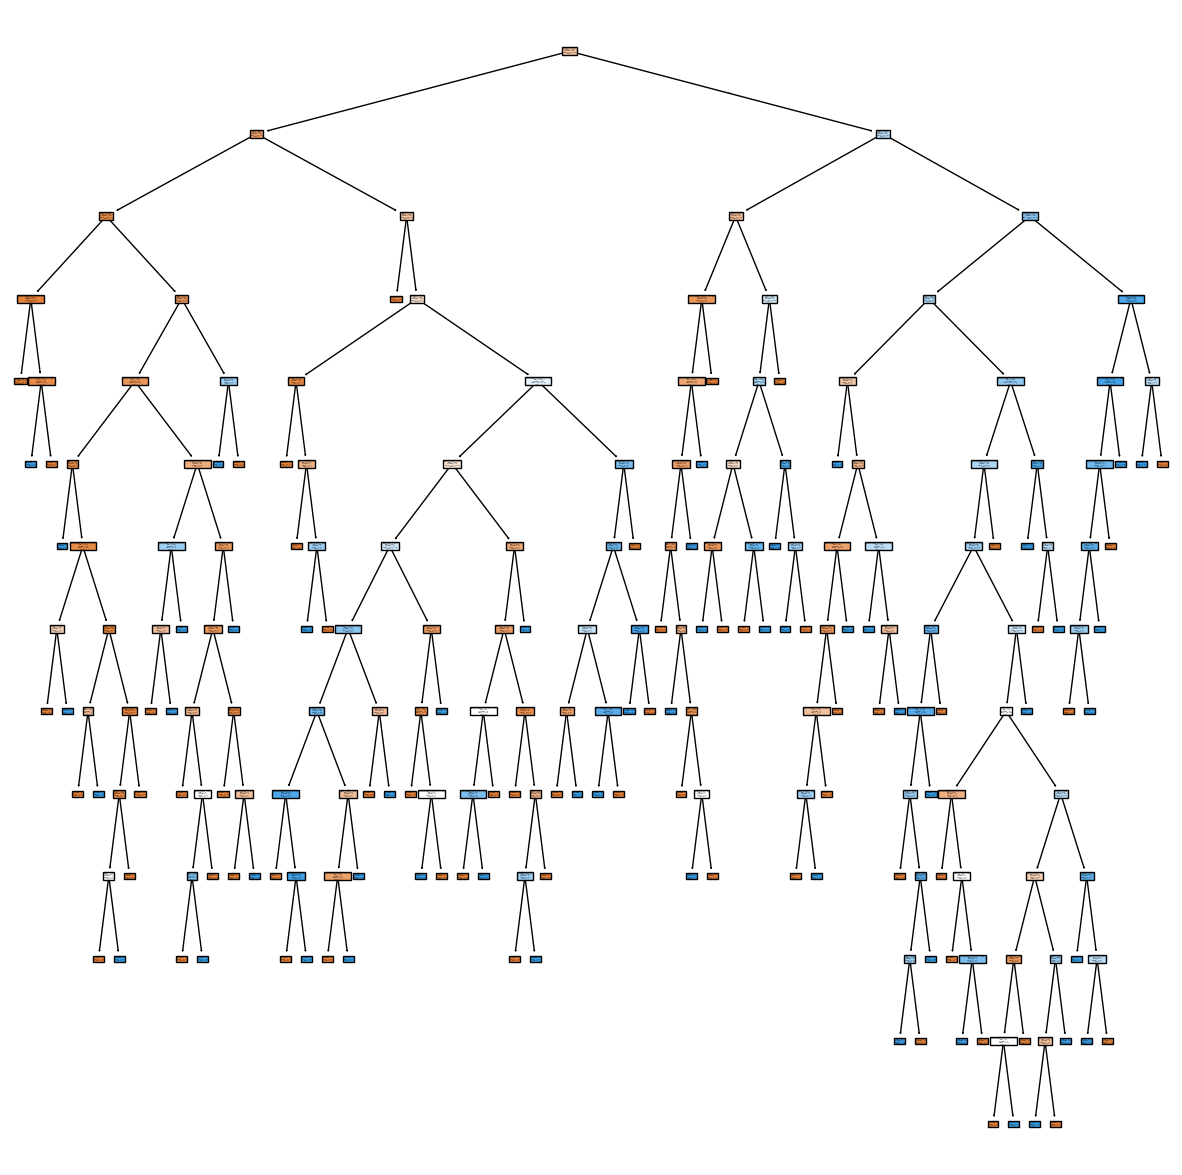

In [66]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [67]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7142857142857143

Optimizacion del modelo

In [68]:
hiperparametros = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4]
}

model_grid = GridSearchCV(model, hiperparametros, scoring = "accuracy", cv = 20)

model_grid

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [69]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

model_grid.fit(X_train, y_train)

print(f"Best hyperparameters: {model_grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'splitter': 'random'}


In [70]:
model_tree_opt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 3, min_samples_split = 10, splitter = 'random', random_state = 42)

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [74]:
y_pred_opt = model.predict(X_test)

accuracy_score(y_test, y_pred_opt)


0.7142857142857143

In [75]:
from pickle import dump

dump(model_tree_opt, open("../models/tree_classifier_opt.sav", "wb"))